<a href="https://colab.research.google.com/github/amaeda1967/Training/blob/master/BERT_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers

In [2]:
import torch
from transformers import BertTokenizer, BertModel

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [5]:
vocablist = list(tokenizer.vocab.keys())

In [6]:
len(vocablist)

30522

In [8]:
text = "After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank."

In [9]:
tokenized_text = tokenizer.tokenize(text)

In [10]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

In [11]:
tokenizer.convert_tokens_to_ids('king')

2332

In [12]:
tokenizer.convert_ids_to_tokens(2332)

'king'

In [13]:
segment_ids = [1]*len(tokenized_text)

In [14]:
token_tensor = torch.tensor(indexed_tokens)
segments_tensor = torch.tensor(segment_ids)

In [6]:
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True, output_attentions = True)

In [8]:
word_embeddings = model.embeddings.word_embeddings.weight

In [9]:
def get_vec(x):
  idx = tokenizer.convert_tokens_to_ids(x)
  vec = word_embeddings[idx].detach().numpy()
  return vec

In [10]:
def cosin_sim(x, y):
  import numpy as np
  d = np.dot(x, y)/np.linalg.norm((x)*np.linalg.norm(y))
  return d

In [11]:
veclist = word_embeddings.detach().numpy()

In [12]:
veclist.shape

(30522, 768)

In [50]:
closestwords

array([ 4610, 18730, 21791, ...,   102,  2000,  2013])

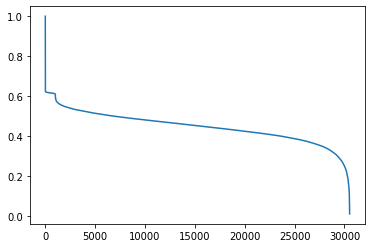

In [71]:
plt.plot(np.sort(simlist)[::-1])

(array([1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 6.000e+00,
        3.000e+00, 5.000e+00, 8.000e+00, 8.000e+00, 9.000e+00, 9.000e+00,
        1.300e+01, 1.900e+01, 2.200e+01, 2.400e+01, 1.900e+01, 3.200e+01,
        3.600e+01, 3.900e+01, 4.600e+01, 4.900e+01, 6.700e+01, 8.400e+01,
        9.600e+01, 1.090e+02, 1.310e+02, 1.710e+02, 1.590e+02, 1.950e+02,
        2.400e+02, 2.810e+02, 3.460e+02, 4.000e+02, 5.480e+02, 6.350e+02,
        7.310e+02, 9.120e+02, 1.046e+03, 1.254e+03, 1.471e+03, 1.598e+03,
        1.662e+03, 1.706e+03, 1.791e+03, 1.759e+03, 1.806e+03, 1.753e+03,
        1.634e+03, 1.446e+03, 1.254e+03, 1.094e+03, 9.210e+02, 7.160e+02,
        5.160e+02, 3.220e+02, 1.980e+02, 7.400e+01, 2.700e+01, 7.000e+00,
        1.850e+02, 8.120e+02, 4.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

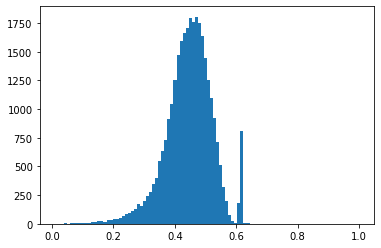

In [72]:
plt.hist(simlist, bins = 100)

In [29]:
np.sort(simlist)[::-1][150:200]

array([0.46202365, 0.46194199, 0.46185449, 0.46180519, 0.46170318,
       0.46168679, 0.46167156, 0.4616015 , 0.46153682, 0.46141204,
       0.46135867, 0.46132636, 0.46125764, 0.46124479, 0.46123236,
       0.46115601, 0.46088454, 0.4607912 , 0.46073765, 0.46070075,
       0.4606584 , 0.46046093, 0.46029261, 0.46024671, 0.46019873,
       0.46018198, 0.46017587, 0.46015686, 0.45996058, 0.4599497 ,
       0.45990109, 0.45978105, 0.45970216, 0.4596796 , 0.45947236,
       0.45942011, 0.45929694, 0.45929039, 0.45928961, 0.45927814,
       0.45922357, 0.45920452, 0.45918965, 0.4591876 , 0.45917985,
       0.45915926, 0.45914266, 0.45909905, 0.45909068, 0.45905381])

In [27]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [29]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [36]:
veclist_mini = veclist[:10]

In [81]:
t = get_vec('father')

simlist = np.zeros(len(veclist),)

for i in range(len(veclist)):
  simlist[i] = cosin_sim(t, veclist[i])

closestwords = np.argsort(simlist)[::-1]

n = 20
top_n = closestwords[0:20]
for i in range(len(top_n)):
  word = tokenizer.convert_ids_to_tokens(top_n[i].item())
  similarity = simlist[top_n[i].item()]
  print(i, word, similarity)

0 father 1.0000001192092896
1 mother 0.7439195513725281
2 dad 0.6255789399147034
3 brother 0.6254437565803528
4 grandfather 0.6155560612678528
5 fathers 0.5951598882675171
6 parents 0.5889931917190552
7 grandmother 0.5596255660057068
8 uncle 0.5566222071647644
9 son 0.5445084571838379
10 stepfather 0.52768874168396
11 sister 0.5120916366577148
12 daddy 0.5066556334495544
13 husband 0.4979468286037445
14 mothers 0.49515825510025024
15 mom 0.49314430356025696
16 godfather 0.489383727312088
17 daughter 0.48465752601623535
18 wife 0.4750252068042755
19 uncles 0.47393202781677246


In [83]:
z = np.zeros((20, 768))

for i in range(20):
  z[i] = veclist[closestwords[i]]

In [84]:
z = linkage (z, method='ward')

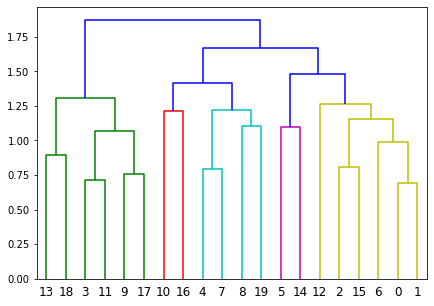

In [85]:
fig = plt.figure(figsize=(7,5))
dn = dendrogram(z)

In [31]:
clustering = AgglomerativeClustering().fit(veclist_mini)

In [33]:
dendrogram(linkage(clustering))

TypeError: ignored

AttributeError: ignored

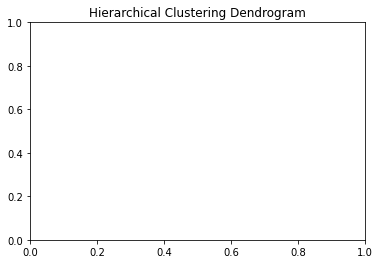

In [32]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [29]:
import sys
print(sys.version)

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


In [23]:
pip list scikit-learn

Package                       Version        
----------------------------- ---------------
absl-py                       0.10.0         
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
argon2-cffi                   20.1.0         
asgiref                       3.3.0          
astor                         0.8.1          
astropy                       4.1            
astunparse                    1.6.3          
async-generator               1.10           
atari-py                      0.2.6          
atomicwrites                  1.4.0          
attrs                         20.2.0         
audioread                     2.1.9          
autograd                      1.3            
Babel                         2.8.0          
backcall                      0.2.0          
beautifulsoup4                4.6.3          
bleach                        3.2.1          
blis                          0.4.

In [81]:
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [82]:
clustering.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [44]:
cosin_sim(t, veclist[25249])

0.7661352

In [39]:
simlist[1000:1010]

array([0.07523131, 0.3404316 , 0.40461662, 0.31408155, 0.28544664,
       0.0578075 , 0.11336189, 0.11387689, 0.2499617 , 0.34887826])

In [33]:
t = get_vec('iphone')
x = [0,2]
s = veclist[x]

(lambda x : cosin_sim(t, veclist[x]))(x)



ValueError: ignored

In [61]:
x = get_vec('japan')
y = get_vec('computer')

cosin_sim(x, y)

0.3000526

In [65]:
s = get_vec('king')
cosin_sim(s, x)

0.23477039

In [101]:
input = 'rich'
s = get_vec(input)
s_id = tokenizer.convert_tokens_to_ids(input)

d = 0

for i in range(len(word_embeddings)):
  if i != s_id:
    t = word_embeddings[i].detach().numpy()
    c = cosin_sim(s, t)

    if c > d:
      closest = i
      d = c

closest_word = tokenizer.convert_ids_to_tokens(closest)
print(closest)
print(closest_word)
print(d)



26108
richer
0.64483076


In [71]:
print(closest)

30521


In [72]:
t = word_embeddings[30521].detach().numpy()
cosin_sim(s, t)

0.20063965

In [20]:
word_embeddings[idx]

tensor([ 1.0459e-02, -4.1597e-02, -2.8762e-02, -2.1271e-03, -3.6137e-02,
        -5.9453e-02, -1.8821e-02, -5.3518e-02, -4.5944e-02, -1.0334e-01,
        -2.6336e-02, -3.7564e-02,  4.7280e-05, -4.1316e-02,  1.1089e-03,
        -3.4041e-02,  3.6455e-03, -4.3182e-03,  4.5244e-02, -3.2792e-03,
        -2.9757e-02, -1.2348e-02,  2.7182e-02,  1.8084e-02, -8.3842e-03,
        -4.1677e-02,  1.1041e-02,  3.2859e-03,  2.8347e-02, -1.0402e-02,
         5.0695e-02, -5.3480e-02, -3.2858e-02, -2.4704e-02, -4.6392e-03,
        -9.3113e-03,  3.9658e-02,  1.9593e-02, -3.8411e-03, -2.7013e-02,
        -4.1830e-02, -3.2505e-02,  4.3060e-02, -3.7079e-02, -4.0751e-02,
         2.2578e-02, -4.2186e-02, -9.9416e-03,  1.2697e-02,  4.2084e-02,
         1.2595e-02, -1.4879e-02, -7.6563e-02,  4.5787e-03,  2.0950e-03,
        -4.4385e-02,  4.1950e-02,  2.3039e-02, -1.2759e-02,  7.6823e-03,
        -1.9078e-02, -2.7273e-02, -1.5740e-02, -2.0539e-03, -4.4950e-02,
         1.5379e-03, -7.2257e-02, -1.5909e-02, -6.5

In [ ]:
indexed_tokens

[2044,
 11065,
 2769,
 2013,
 1996,
 2924,
 11632,
 1010,
 1996,
 2924,
 27307,
 2001,
 2464,
 5645,
 2006,
 1996,
 5900,
 2314,
 2924,
 1012]

In [ ]:
we_array = word_emnbeddings.detach().numpy()

In [ ]:
import numpy as np

In [ ]:
we_array.shape

(30522, 768)

In [ ]:
king = 